In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
#read dataset
df = pd.read_csv("dataset.csv")

In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


## All data represantation

In [10]:
#Get info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [11]:
#Understand which columns are categories
df.nunique()

age           41
sex            2
cp             4
trestbps      50
chol         152
fbs            2
restecg        3
thalach       91
exang          2
oldpeak       40
slope          3
ca             4
thal           3
condition      2
dtype: int64

In [12]:
categories = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]
non_categories = ["age", "trestbps", "chol", "thalach", "oldpeak"]

In [13]:
#get statistics from dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


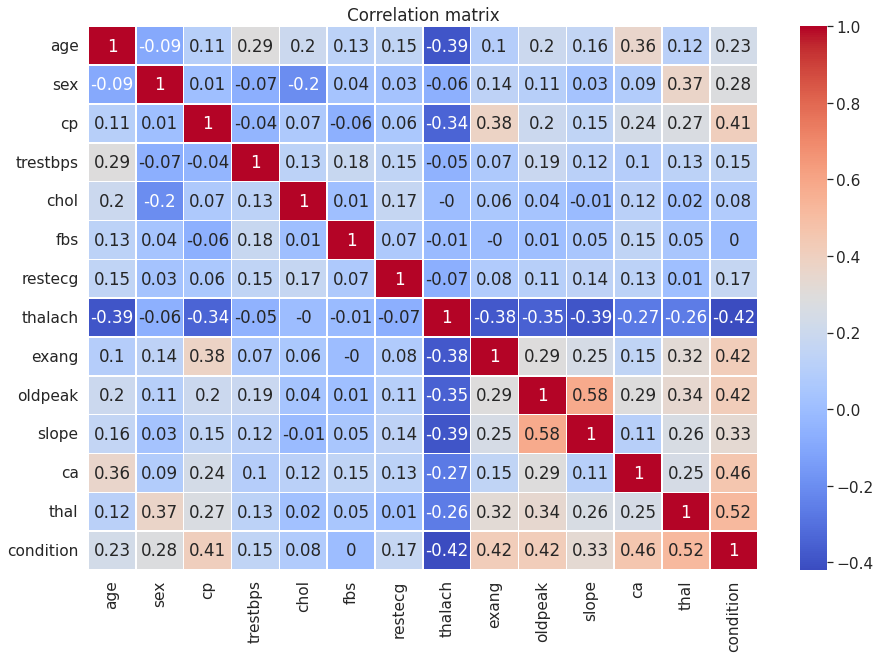

In [14]:
#Draw corellation matrix

plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

## Plots

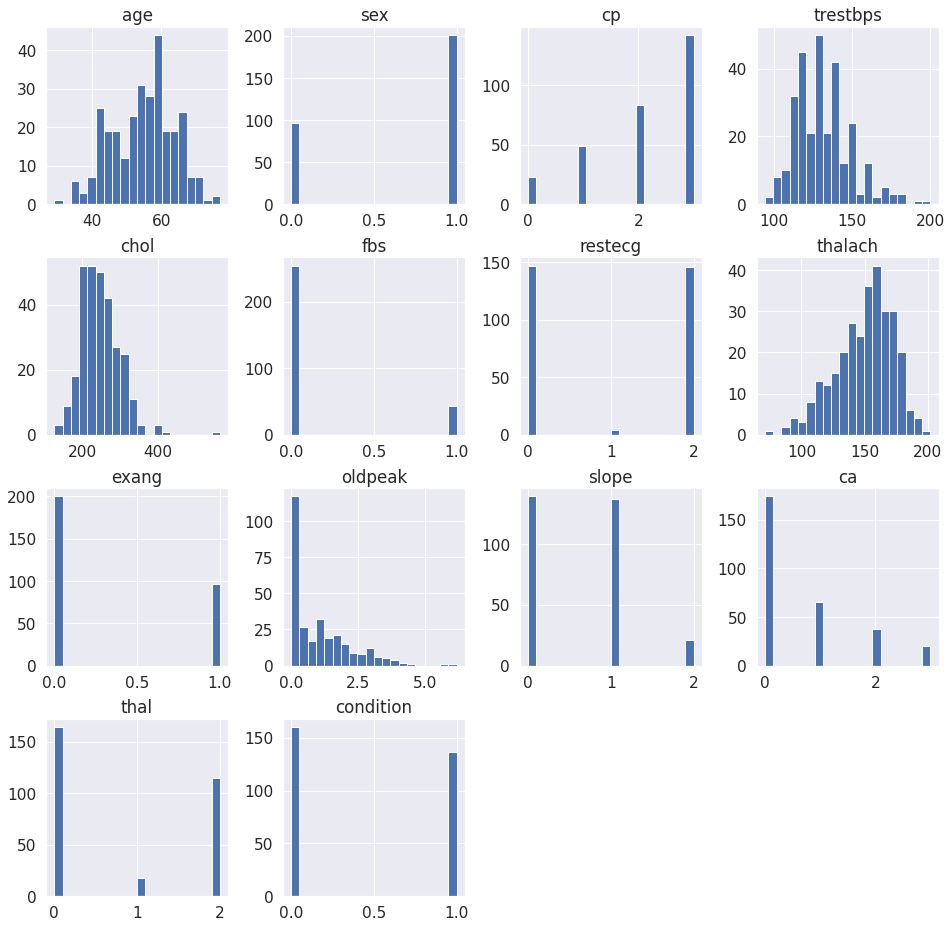

In [15]:
#Histograms
df.hist(figsize=(16,16), bins=20)
plt.show()

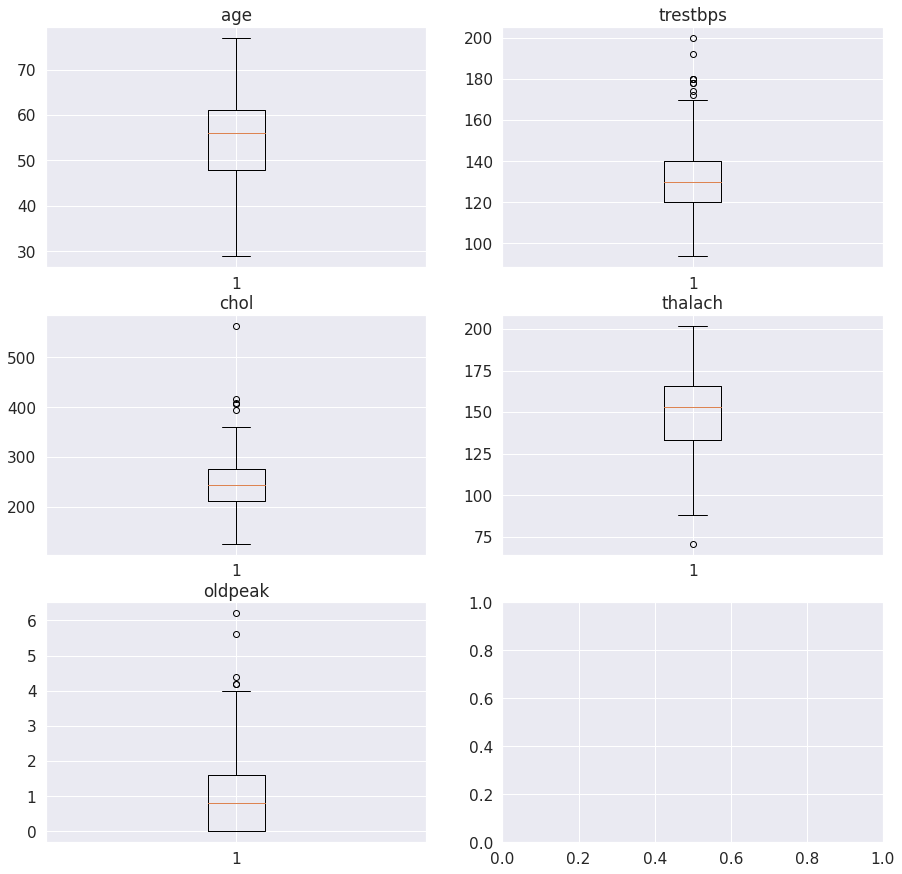

In [16]:
## Subplots for non categorical-features
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

for i in range(len(non_categories)):
  axs[i // 2, i % 2].boxplot(df[non_categories[i]])
  axs[i // 2, i % 2].title.set_text(non_categories[i])

**Выводы:**
+ Данные чистые, без пропусков
+ 5 числовых фичей, 8 категориальных
+ Распределение таргета равномерно
+ Сильно кореллирующие значения остутствуют

# Try models

In [17]:
X = df.drop("condition", axis = 1)
Y = df["condition"]

In [18]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0


In [19]:
Y.head()

0    0
1    0
2    0
3    1
4    0
Name: condition, dtype: int64

## LogReg

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
modelLR = LogisticRegression(max_iter=1000)

In [22]:
modelLR.fit(X, Y)

LogisticRegression(max_iter=1000)

## KNN

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
model_tree = DecisionTreeClassifier()

In [25]:
model_tree.fit(X, Y)

DecisionTreeClassifier()

## Evaluate

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [27]:
def evaluate_model(
    true_values: np.ndarray,
    predict_values: pd.Series):
  return {
      "accuracy": accuracy_score(true_values, predict_values),
      "precision": precision_score(true_values, predict_values),
      "recall": recall_score(true_values, predict_values)
  }

In [28]:
evaluate_model(Y, modelLR.predict(X))

{'accuracy': 0.8484848484848485,
 'precision': 0.8538461538461538,
 'recall': 0.8102189781021898}

In [29]:
#it's expexted - model teach on data and then predict it, it simply check that pipeline is runnig
evaluate_model(Y, model_tree.predict(X))

{'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0}